# We will conduct an Outlier Observation Analysis together today. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("marketing_data.csv")
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


## Catching Outliers


In [4]:
df = df.select_dtypes(include = ["float64", "int64"])

df.head(5)

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,1826,1970,0,0,0,189,104,379,111,189,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,0,0,0,464,5,64,7,0,...,3,7,5,0,0,0,0,1,1,0
2,10476,1958,0,1,0,134,11,59,15,2,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,1,1,0,10,0,1,0,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,1,0,0,6,16,24,11,0,...,1,2,7,1,0,0,0,0,1,0


In [5]:
# We are capturing outliers over a single variable.

df_MntMeatProducts = df["MntMeatProducts"]
df_MntMeatProducts.head()

0    379
1     64
2     59
3      1
4     24
Name: MntMeatProducts, dtype: int64

<AxesSubplot:xlabel='MntMeatProducts'>

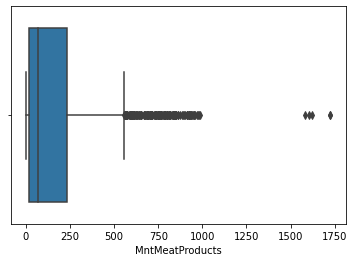

In [6]:
# Let's look at the boxplot graphic from the Seaborn Library

sns.boxplot(x = df_MntMeatProducts)

In [7]:
# We need to determine the missing values.
# We are looking with Boxplot.

Q1 = df_MntMeatProducts.quantile(0.25) # When sorted from small to large, it will take 25% observation.
Q3 = df_MntMeatProducts.quantile(0.75) # When sorted from small to large, it will take 75% observation.

IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

16.0
232.0
216.0


In [8]:
# Now we find the limits

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(lower_limit)
print(upper_limit)


-308.0
556.0


In [9]:
# If outlier is correct 

(df_MntMeatProducts < lower_limit) | (df_MntMeatProducts > upper_limit)

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238     True
2239    False
Name: MntMeatProducts, Length: 2240, dtype: bool

In [10]:
Outlier_real = (df_MntMeatProducts < lower_limit)
df_MntMeatProducts[Outlier_real]

Series([], Name: MntMeatProducts, dtype: int64)

In [11]:
df_MntMeatProducts[Outlier_real].index

Int64Index([], dtype='int64')

# Solving the Outlier Problem 


In [12]:
# Delete
df_MntMeatProducts = pd.DataFrame(df_MntMeatProducts)
df_MntMeatProducts.head()

,MntMeatProducts
0,379
1,64
2,59
3,1
4,24


In [14]:
df_MntMeatProducts.shape

(2240, 1)

In [15]:
df_MntMeatProducts.isnull().sum()

MntMeatProducts    0
dtype: int64

In [16]:
df = pd.read_csv("marketing_data.csv")
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [18]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [22]:
#We could not analyze this data much. Hope to see you in the next dirty data.
